<a href="https://colab.research.google.com/github/maidacundo/DeepLearningREPO/blob/main/SoluzioneEsameTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re
def pre_process(df):
    def tweet_pre_process(tweet):
        ret = re.sub("RT @(.)+?:\s|(&#[0-9]+;)|@([\w\-]+)|(#)\S+|(http)s?\S+|&gt;|^\s+|\b\s+|\n", "", tweet)
        ret = re.sub("\s\s+|[^a-zA-Z\d\s:]" , " ", ret).rstrip().lower()
        return ret
    return df["tweet"].apply(tweet_pre_process)

In [3]:
df_train = pd.read_csv ('train_data.csv', sep=",")
df_val = pd.read_csv ('val_data.csv', sep=",")
df_test = pd.read_csv ('test_data.csv', sep=",")

classes = df_train["class"].value_counts()
print(classes)

1    13412
2     2938
0      998
Name: class, dtype: int64


In [4]:
df_train["tweet"] = pre_process(df_train)
df_val["tweet"] = pre_process(df_val)
df_test["tweet"] = pre_process(df_test)

In [5]:
df_train.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,8573,3,1,2,0,1,can t get no money from me you silly hoe
1,21898,3,0,3,0,1,that was almost 10 years ago i gave all them ...
2,17409,3,0,3,0,1,bitches tweeting last night like they did s...
3,21861,3,0,3,0,1,that hoe out there fat trel said it best
4,8532,3,0,0,3,2,can charlie crist pull one over on rick scott ...


In [6]:
x_train, y_train = df_train["tweet"], df_train["class"]
x_val, y_val = df_val["tweet"], df_val["class"]
x_test, y_test = df_test["tweet"], df_test["class"]

In [7]:
y_train.value_counts()

1    13412
2     2938
0      998
Name: class, dtype: int64

In [31]:
i = 0
words_dict = {}
total_words = 0

for row in x_train:
  for word in row.split(' '):
    total_words += 1
    if word not in words_dict:
      words_dict[word] = i
      i += 1

for row in x_test:
  for word in row.split(' '):
    total_words += 1
    if word not in words_dict:
      words_dict[word] = i
      i += 1

for row in x_val:
  for word in row.split(' '):
    total_words += 1
    if word not in words_dict:
      words_dict[word] = i
      i += 1

print('Total words: {}, Unique words: {}'.format(total_words, str(len(words_dict))))
num_words = len(words_dict)
words_dict_translate = {y: x for x, y in words_dict.items()}

Total words: 360824, Unique words: 19823


In [32]:
i = 0
for row in x_train:
  for word in row.split(' '):
    if word == 'can':
      i += 1

print(f"Number of 'can' words: {i}")

Number of 'can' words: 962


In [98]:
x_train_num = x_train.apply(lambda x: list(words_dict[word] for word in x.split(' ')))
x_test_num = x_test.apply(lambda x: list(words_dict[word] for word in x.split(' ')))
x_val_num = x_val.apply(lambda x: list(words_dict[word] for word in x.split(' ')))

In [99]:
to_shuffle = x_train_num[:4000].copy()
to_shuffle

0                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...
2       [21, 27, 16, 28, 29, 16, 16, 30, 24, 31, 32, 3...
3                 [10, 9, 37, 38, 16, 39, 40, 41, 42, 43]
4       [0, 44, 45, 46, 47, 48, 49, 50, 51, 16, 52, 53...
                              ...                        
3995                         [16, 6954, 6, 104, 793, 522]
3996    [56, 189, 6955, 125, 183, 6956, 2051, 49, 6957...
3997    [16, 493, 1976, 230, 3943, 16, 16, 16, 16, 695...
3998               [766, 181, 125, 136, 1, 433, 582, 349]
3999        [16, 5730, 6960, 201, 767, 117, 1974, 6, 616]
Name: tweet, Length: 4000, dtype: object

In [100]:
import random
for el in to_shuffle:
  random.shuffle(el)

print(list(to_shuffle))


[[2, 3, 1, 0, 9, 8, 6, 5, 7, 4], [14, 12, 19, 20, 16, 15, 13, 16, 21, 25, 18, 11, 16, 23, 24, 22, 26, 16, 17, 10], [24, 36, 31, 28, 29, 33, 27, 35, 16, 16, 21, 30, 34, 32, 16], [16, 43, 41, 37, 38, 40, 10, 9, 39, 42], [49, 52, 54, 47, 55, 44, 48, 50, 46, 0, 45, 48, 51, 16, 49, 53, 47, 31, 46], [64, 16, 62, 66, 63, 61, 63, 59, 10, 60, 7, 58, 56, 57, 65], [72, 16, 59, 16, 70, 71, 69, 21, 67, 68], [78, 88, 85, 73, 75, 77, 16, 74, 79, 73, 19, 80, 19, 86, 81, 82, 76, 83, 84, 87, 7, 29], [90, 16, 96, 16, 94, 10, 95, 21, 16, 16, 89, 93, 91, 92, 67, 56], [16, 9, 97, 98], [113, 108, 112, 99, 102, 107, 104, 78, 103, 60, 110, 60, 106, 67, 107, 105, 101, 100, 111, 109, 24, 114], [120, 119, 67, 116, 23, 66, 16, 117, 115, 118, 11, 73], [126, 123, 124, 121, 125, 122], [17, 129, 127, 21, 7, 56, 20, 20, 111, 130, 11, 131, 128], [9, 7, 134, 133, 132, 135, 16], [141, 23, 137, 10, 136, 99, 1, 10, 139, 138, 142, 61, 140], [143, 150, 148, 145, 16, 16, 148, 125, 16, 149, 146, 16, 144, 16, 144, 147, 153, 125,

In [101]:
len(x_train_num)

17348

In [102]:
x_train_num = x_train_num.append(to_shuffle)

In [103]:
len(x_train_num)

21348

In [96]:
count = {}

for row in x_train_num:
  for word in row:
    count[word] = count.get(word, 0) + 1

In [97]:
removed = set()
for row in x_train_num:
  for word in row:
    if count[word] > 6000:
      row.remove(word)
      removed.add(word)
print(x_train_num[0])
print(x_train[0])

for word in removed:
  print(f'removed {words_dict_translate[word]}')

0    [4, 8, 7, 0, 6, 2, 5, 1, 3, 9]
0    [4, 8, 7, 0, 6, 2, 5, 1, 3, 9]
Name: tweet, dtype: object
can t get no money from me you silly hoe
removed 
removed i
removed a
removed the
removed bitch


In [104]:
def multi_hot_sequences(sequences, dimension): 
  multi_hot = np.zeros((len(sequences),dimension))
  print(multi_hot.shape)
  for i in range(0,len(sequences)):
    multi_hot[i, sequences[i]] = 1
  return multi_hot

x_train_hot = multi_hot_sequences(x_train_num, num_words)
x_test_hot = multi_hot_sequences(x_test_num, num_words)
x_val_hot = multi_hot_sequences(x_val_num, num_words)

(21348, 19823)


IndexError: ignored

In [61]:
input = Input(shape=(num_words,))
x = Dense(64, activation='relu')(input)
x = Dropout(0.3) (x)
x = Dense(128, activation='relu')(input)
x = Dropout(0.3) (x)
x = Dense(64, activation='relu')(input)
x = Dropout(0.3) (x)
x = Dense(16, activation='relu')(x)
output = Dense(3, activation='sigmoid')(x)

base_model = Model(input, output)

In [62]:
base_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics="accuracy")
hist = base_model.fit(x_train_hot, y_train, epochs=10, validation_data=(x_val_hot, y_val))

Epoch 1/10
543/543 [==============================] - 7s 13ms/step - loss: 0.7814 - accuracy: 0.7552 - val_loss: 0.5697 - val_accuracy: 0.7829
Epoch 2/10
543/543 [==============================] - 8s 15ms/step - loss: 0.4937 - accuracy: 0.8078 - val_loss: 0.4146 - val_accuracy: 0.8693
Epoch 3/10
543/543 [==============================] - 7s 13ms/step - loss: 0.3650 - accuracy: 0.8838 - val_loss: 0.3465 - val_accuracy: 0.8862
Epoch 4/10
543/543 [==============================] - 7s 13ms/step - loss: 0.2956 - accuracy: 0.9050 - val_loss: 0.3158 - val_accuracy: 0.8889
Epoch 5/10
543/543 [==============================] - 7s 13ms/step - loss: 0.2514 - accuracy: 0.9155 - val_loss: 0.3001 - val_accuracy: 0.8908
Epoch 6/10
543/543 [==============================] - 7s 13ms/step - loss: 0.2190 - accuracy: 0.9251 - val_loss: 0.2880 - val_accuracy: 0.8930
Epoch 7/10
543/543 [==============================] - 7s 13ms/step - loss: 0.1922 - accuracy: 0.9339 - val_loss: 0.2847 - val_accuracy: 0.8921

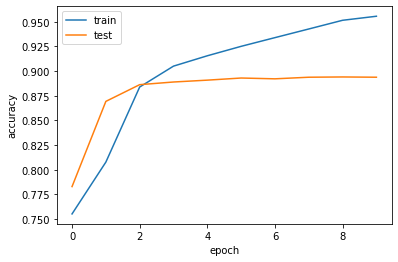

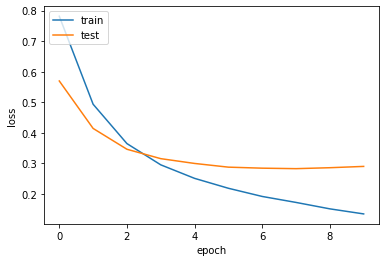

In [64]:
def plot_history(model_history,keys):
    m,val_m = keys
    plt.plot(model_history.history[m])
    plt.plot(model_history.history[val_m])
    plt.ylabel(m)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(hist,['accuracy','val_accuracy'])
plot_history(hist,['loss','val_loss'])

In [63]:
from sklearn.metrics import classification_report

y_d = base_model.predict(x_test_hot)
y_d = np.argmax(y_d, axis=1)
y_t = y_test
print(y_d[y_d==0].shape, y_d[y_d==1].shape, y_d[y_d==2].shape)
print(classification_report(y_t, y_d))

(112,) (2968,) (637,)
              precision    recall  f1-score   support

           0       0.52      0.25      0.34       230
           1       0.92      0.95      0.93      2867
           2       0.83      0.85      0.84       620

    accuracy                           0.89      3717
   macro avg       0.76      0.69      0.71      3717
weighted avg       0.88      0.89      0.88      3717

